In [2]:
import random

def random_kid():
    return random.choice(['boy', 'girl'])

both_girls = 0
older_girl = 0
either_girl = 0

random.seed(0)
for _ in range(10000):
    younger = random_kid()
    older = random_kid()
    if older == 'girl':
        older_girl += 1
    if older == "girl" and younger == "girl":
        both_girls += 1
    if older == "girl" or younger == "girl":
        either_girl += 1

print ("P(both | older):", both_girls / older_girl)     # 0.514 - 1/2
print ("P(both | either):", both_girls / either_girl)   # 0.342 - 1/3

P(both | older): 0.5007089325501317
P(both | either): 0.3311897106109325


**Bayes's Theorem**
P(E|F) = P(E,F) / P(F) 
       = [ P(F|E)*P(E) ] / P(F)

P(F) = P(F,E) + P(F,~E)

=> 
P(E|F) = P(F|E)*P(E) / [P(F/E)*P(E) + P(F|~E)*P(~E)]

**Continuous Distributions**

In [3]:
def uniform_pdf(x): # probability distribution function
    return 1 if x >= 0 and x < 1 else 0

print(uniform_pdf(-1))
print(uniform_pdf(0))
print(uniform_pdf(0.5))
print(uniform_pdf(1))
print(uniform_pdf(1.5))

0
1
1
0
0


In [4]:
def uniform_cdf(x):  # cumulative distribution function
    "returns the probability that a unifrom random variable is <=x"
    if x < 0:   return 0 # uniform random is never less than 0
    elif x < 1: return x # e.g P(x <= 0.4) = 0.4
    else:       return 1 # unifrom ranfom is always less than 1
    
print (uniform_cdf(-1))
print (uniform_cdf(0))
print (uniform_cdf(0.4))
print (uniform_cdf(0.5))
print (uniform_cdf(1))
print (uniform_cdf(1.5))

0
0
0.4
0.5
1
1


**The Normal Distribution**

<function matplotlib.pyplot.show>

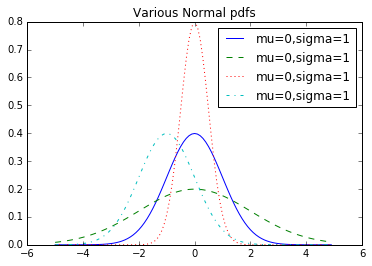

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
import math

def normal_pdf(x, mu=0, sigma=1):
    sqrt_two_pi = math.sqrt(2 * math.pi)
    return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2) / (sqrt_two_pi * sigma))

xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs,[normal_pdf(x,sigma=1) for x in xs], "-", label="mu=0,sigma=1")
plt.plot(xs,[normal_pdf(x,sigma=2) for x in xs], "--", label="mu=0,sigma=1")
plt.plot(xs,[normal_pdf(x,sigma=0.5) for x in xs], ":", label="mu=0,sigma=1")
plt.plot(xs,[normal_pdf(x,mu=-1) for x in xs], "-.", label="mu=0,sigma=1")
plt.legend()
plt.title("Various Normal pdfs")
plt.show

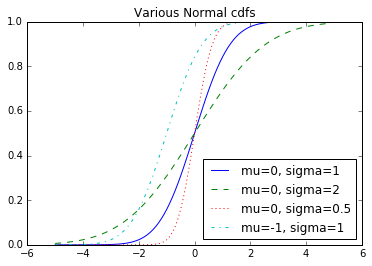

In [6]:
def normal_cdf(x, mu=0, sigma=1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

xs = [x / 10.0 for x in range(-50,50)]
plt.plot(xs,[normal_cdf(x,sigma=1) for x in xs], '-', label='mu=0, sigma=1')
plt.plot(xs,[normal_cdf(x,sigma=2) for x in xs], '--', label='mu=0, sigma=2')
plt.plot(xs,[normal_cdf(x,sigma=0.5) for x in xs], ':', label='mu=0, sigma=0.5')
plt.plot(xs,[normal_cdf(x,mu=-1) for x in xs], '-.', label='mu=-1, sigma=1')
plt.legend(loc=4) # bottom right
plt.title("Various Normal cdfs")
plt.show()

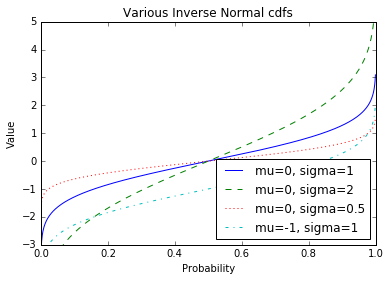

In [23]:
# Find the value corresponding to the specified probability
def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
    """find approximate inverse using binary search"""
    
    # if not standard , compute standard and rescale
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
    
    low_z, low_p = -10.0, 0          # normal_cdf(-10) is (very close to) 0
    hi_z, hi_p = 10.0, 1             # normal_cdf(10)  is (very close to) 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2   # consider the midpoint
        mid_p = normal_cdf(mid_z)    # and the cdf's value there
        if mid_p < p:
            # midpoint is still too low, search above it
            low_z, low_p = mid_z, mid_p
        elif mid_p > p:
            # midpoint is still too high, search below it
            hi_z, hi_p = mid_z, mid_p
        else:
            break
            
    return mid_z

# Try to visualize
x_low = 0
x_high = 1
x_steps = 1000
xs = [x / x_steps for x in range(x_low * x_steps,x_high * x_steps)]
plt.plot(xs,[inverse_normal_cdf(x,sigma=1) for x in xs], '-', label='mu=0, sigma=1')
plt.plot(xs,[inverse_normal_cdf(x,sigma=2) for x in xs], '--', label='mu=0, sigma=2')
plt.plot(xs,[inverse_normal_cdf(x,sigma=0.5) for x in xs], ':', label='mu=0, sigma=0.5')
plt.plot(xs,[inverse_normal_cdf(x,mu=-1) for x in xs], '-.', label='mu=-1, sigma=1')
plt.legend(loc=4) # bottom right
plt.axis((x_low,x_high,-3,5))
plt.ylabel('Value')
plt.xlabel('Probability')
plt.title("Various Inverse Normal cdfs")
plt.show()

**The Central Limit Theorem**

In [32]:
def bernoulli_trial(p):
    return 1 if random.random() < p else 0

def binomial(n, p):
    return sum(bernoulli_trial(p) for _ in range(n))

## test
p = 0.2
for i in range(7):  # test by logarithmically increasing trials
    print(i, binomial(10 ** i, p)/ 10 ** i)


0 1.0
1 0.1
2 0.24
3 0.205
4 0.2008
5 0.20015
6 0.200109


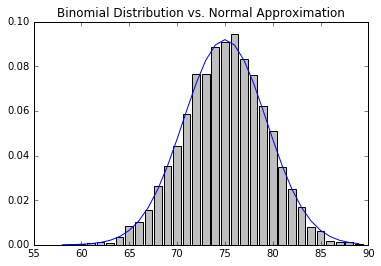

In [40]:
from collections import Counter
def make_hist(p, n, num_points):
    
    data = [binomial(n,p) for _ in range(num_points)]
    
    # use a bar chart to show the actual binomial samples
    histogram = Counter(data)
    plt.bar([x-0.4 for x in histogram.keys()],
            [v / num_points for v in histogram.values()],
            0.8,
            color='0.75')
    mu = p * n
    sigma = math.sqrt(n * p * (1-p))
    
    # use a line chart to shor the normal approximation
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma)
          for i in xs]
    plt.plot(xs, ys)
    plt.title("Binomial Distribution vs. Normal Approximation")
    plt.show()

make_hist(0.75, 100, 10000)